The goal of this notebook is to test an algorithm that may be implemented in the **registration** notebook. 

The principle is to compare two profiles in order to find the offset required in order to minimize the difference between the two profiles

key points:
 * use absolute value when doing the difference
 * narrow down the range of motion of the second profile over the "reference" one, something like 10 or 20 pixels for example

# import 

In [15]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib notebook


# load profile 

In [3]:
filename = "data/vertical_profiles.txt"
assert os.path.exists(filename)

In [6]:
pd_data = pd.read_csv(filename, skiprows=9)

In [12]:
pd_data

,##y_axis,# col.1,# col.2
0,560,0.528983,0.518230
1,561,0.542648,0.513951
2,562,0.550394,0.531603
3,563,0.546004,0.515176
4,564,0.559552,0.505158
...,...,...,...
323,883,1.021830,0.995650
324,884,1.002355,1.006492
325,885,1.003664,1.019801
326,886,1.000419,1.018811


In [85]:
x_axis = np.asarray(pd_data['##y_axis'])
profile1 = np.asarray(pd_data['# col.1'])
profile2 = np.asarray(pd_data['# col.2'])
# profile2 = profile1[:]

## before applying an offset 

<IPython.core.display.Javascript object>


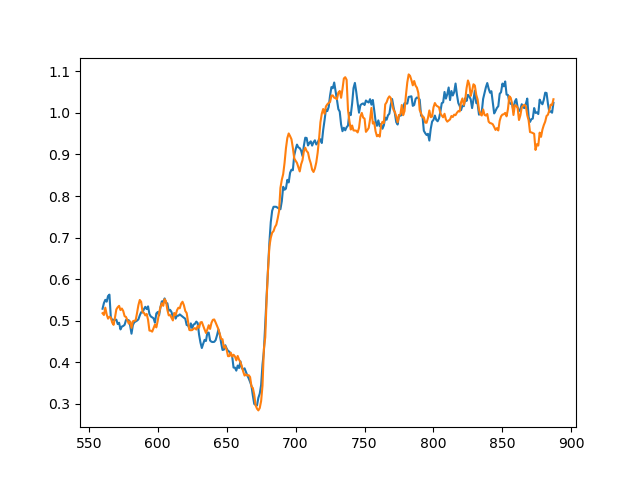

In [86]:
fig, ax = plt.subplots(num="before offset")
ax.plot(x_axis, profile1, x_axis, profile2)

## applying an offset of 5 pixels on profile2 

In [87]:
xoffset = 5

In [88]:
profile2_shiftted = np.roll(profile2, xoffset)
# profile2_shiftted[:xoffset] = profile2_shiftted[xoffset]

<IPython.core.display.Javascript object>


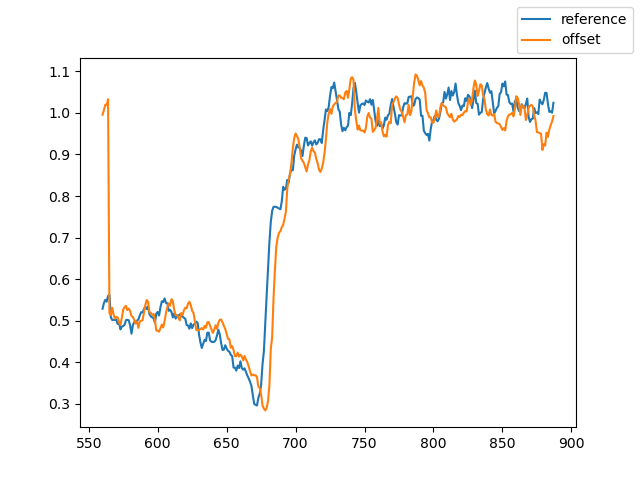

In [89]:
fig, ax = plt.subplots(num=f"after offset by {xoffset} pixels to the right")
ax.plot(x_axis, profile1, label='reference')
ax.plot(x_axis, profile2_shiftted, label='offset')
fig.legend()

## calculating rolling difference from -10 to + 10pixels 

In [90]:
rolling_pixels_limit = 10

In [91]:
list_rolling_profiles = []
for _roll in np.arange(10, -10, -1):
    _profile = np.roll(profile2, _roll)
    list_rolling_profiles.append(_profile)

<IPython.core.display.Javascript object>


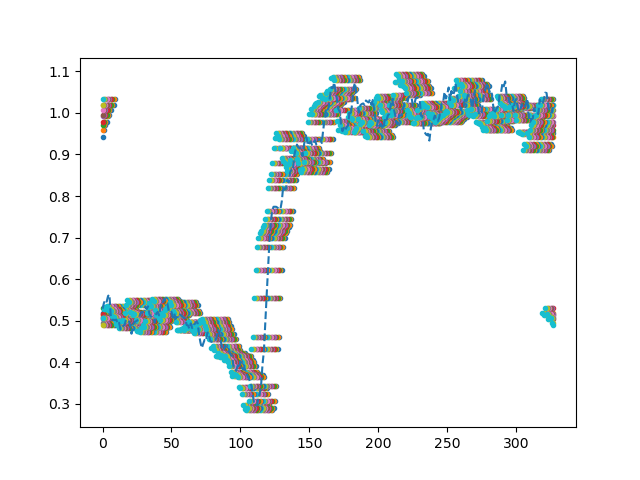

In [92]:
fig, ax = plt.subplots(num=f"all rolling profiles")
for _profile in list_rolling_profiles:
    ax.plot(_profile,'.')
ax.plot(profile1, '--')

# let's truncate the arrays to exclude the parts that rollover (end to beginning) 

In [93]:
reference_profile = profile1[rolling_pixels_limit: -rolling_pixels_limit]
final_list_rolling_profiles = []
for _profile in list_rolling_profiles:
    final_list_rolling_profiles.append(_profile[rolling_pixels_limit: -rolling_pixels_limit])

Checking they have the same size

In [94]:
print(len(reference_profile))
for _profile in final_list_rolling_profiles:
    print(len(_profile))

308
308
308
308
308
308
308
308
308
308
308
308
308
308
308
308
308
308
308
308
308


In [95]:
list_profiles_diff = []
for _profile in final_list_rolling_profiles:
    list_diff = _profile - reference_profile
    abs_list_diff = [np.abs(_value) for _value in list_diff]
    list_profiles_diff.append(np.sum(abs_list_diff))


<IPython.core.display.Javascript object>


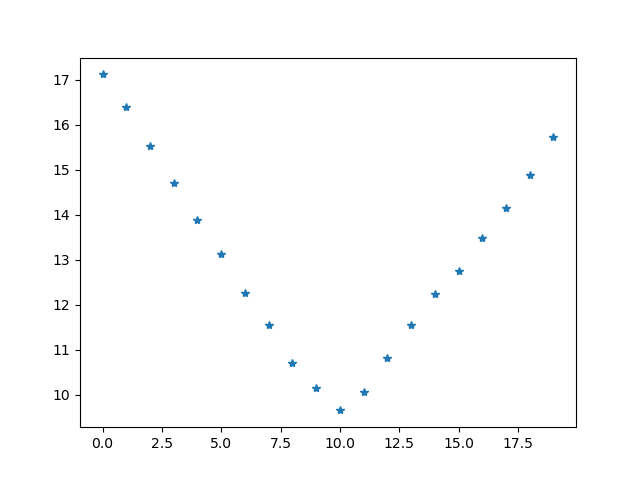

In [96]:
fig, ax = plt.subplots(num=f"sum of abs(diff)")
ax.plot(list_profiles_diff, '*')